In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-boston-houseprice-data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the directory:", file_list)

# Assuming the CSV file is named 'boston.csv' based on the previous output
csv_file_path = os.path.join(path, 'boston.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert to DataFrame (already is a DataFrame after read_csv)
df = pd.DataFrame(df)
# Display the first few rows
display(df.head())

Files in the directory: ['boston.csv']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Input features in order:
# 1) CRIM: per capita crime rate by town
# 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3) INDUS: proportion of non-retail business acres per town
# 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
# 6) RM: average number of rooms per dwelling
# 7) AGE: proportion of owner-occupied units built prior to 1940
# 8) DIS: weighted distances to five Boston employment centres
# 9) RAD: index of accessibility to radial highways
# 10) TAX: full-value property-tax rate per $10,000 [$/10k]
# 11) PTRATIO: pupil-teacher ratio by town
# 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13) LSTAT: % lower status of the population

# Output variable:
# 1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


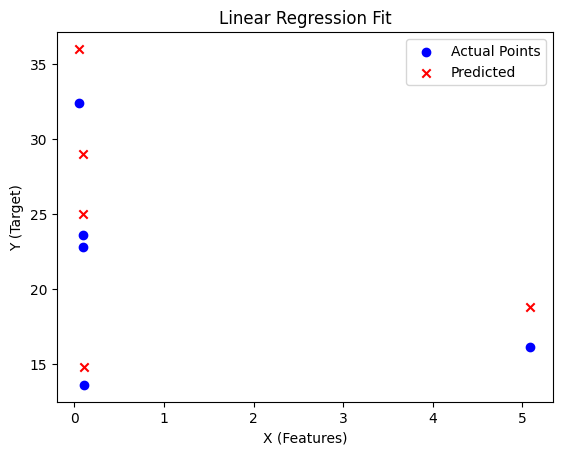

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print(Y_test[:5])
print(y_pred[:5])
plt.scatter(X_test.iloc[:5, 0], Y_test[:5], color='blue', label='Actual Points')
plt.scatter(X_test.iloc[:5, 0], y_pred[:5], color='red', label='Predicted', marker='x')

plt.xlabel("X (Features)")
plt.ylabel("Y (Target)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [ ]:
mse=cross_val_score(lin_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
print(np.mean(mse))

-23.654418270304568


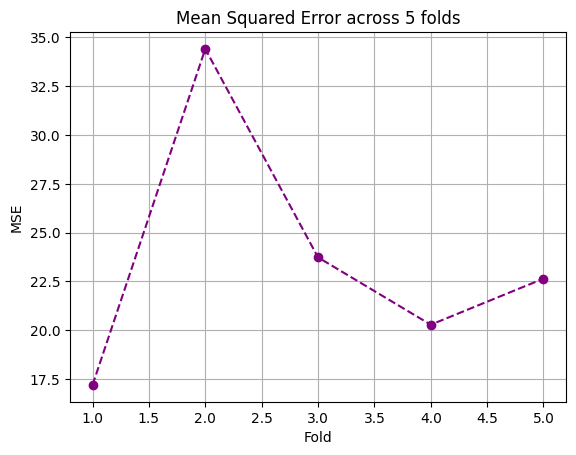

In [ ]:
plt.plot(range(1, 6), -mse, marker='o', linestyle='--', color='purple')
plt.title('Mean Squared Error across 5 folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
print(r2) #0.668 is Moderate so fit another model

0.6687594935356326


{'alpha': 1e-15}
-23.65441827030464
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
0.6687594935356322


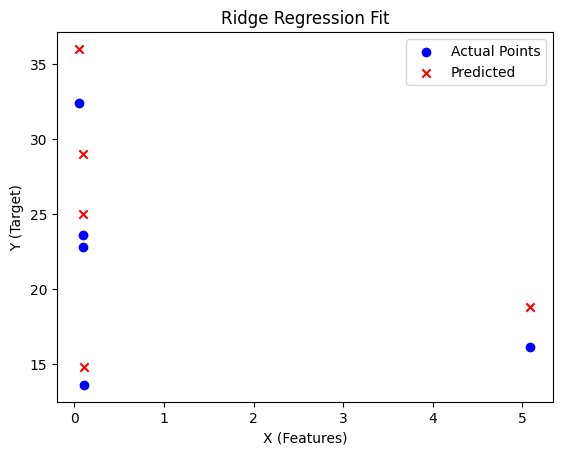

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,20,25,4045,50]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)
Y_pred=ridge_regressor.predict(X_test)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(Y_test[:5])
print(Y_pred[:5])
print(r2_score(Y_test,Y_pred))
plt.scatter(X_test.iloc[:5, 0], Y_test[:5], color='blue', label='Actual Points')
plt.scatter(X_test.iloc[:5, 0], Y_pred[:5], color='red', label='Predicted', marker='x')

plt.xlabel("X (Features)")
plt.ylabel("Y (Target)")
plt.title("Ridge Regression Fit")
plt.legend()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e+03, tolerance: 2.882e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e+03, tolerance: 2.764e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.233e+03, tolerance: 2.710e

{'alpha': 1e-15}
-23.65441827030463
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
0.6687594935356322


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.223e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


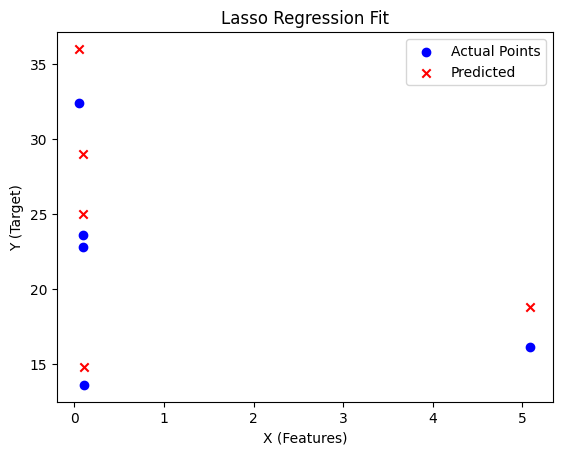

In [ ]:
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,20,25,4045,50]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)
Y_pred=lasso_regressor.predict(X_test)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
print(Y_test[:5])
print(Y_pred[:5])
print(r2_score(Y_test,Y_pred))
plt.scatter(X_test.iloc[:5, 0], Y_test[:5], color='blue', label='Actual Points')
plt.scatter(X_test.iloc[:5, 0], Y_pred[:5], color='red', label='Predicted', marker='x')

plt.xlabel("X (Features)")
plt.ylabel("Y (Target)")
plt.title("Lasso Regression Fit")
plt.legend()

In [ ]:
# #as we can see all the three models are giving the same outputs because :- Feature Count Is Low and All Are Informative
# If you have just a few features (say 4–5 like total_sqft, bhk, bath, etc.), and all are genuinely useful for prediction, then Lasso won’t drop anything, and again it becomes similar to Linear/Ridge.

0.885137272531848


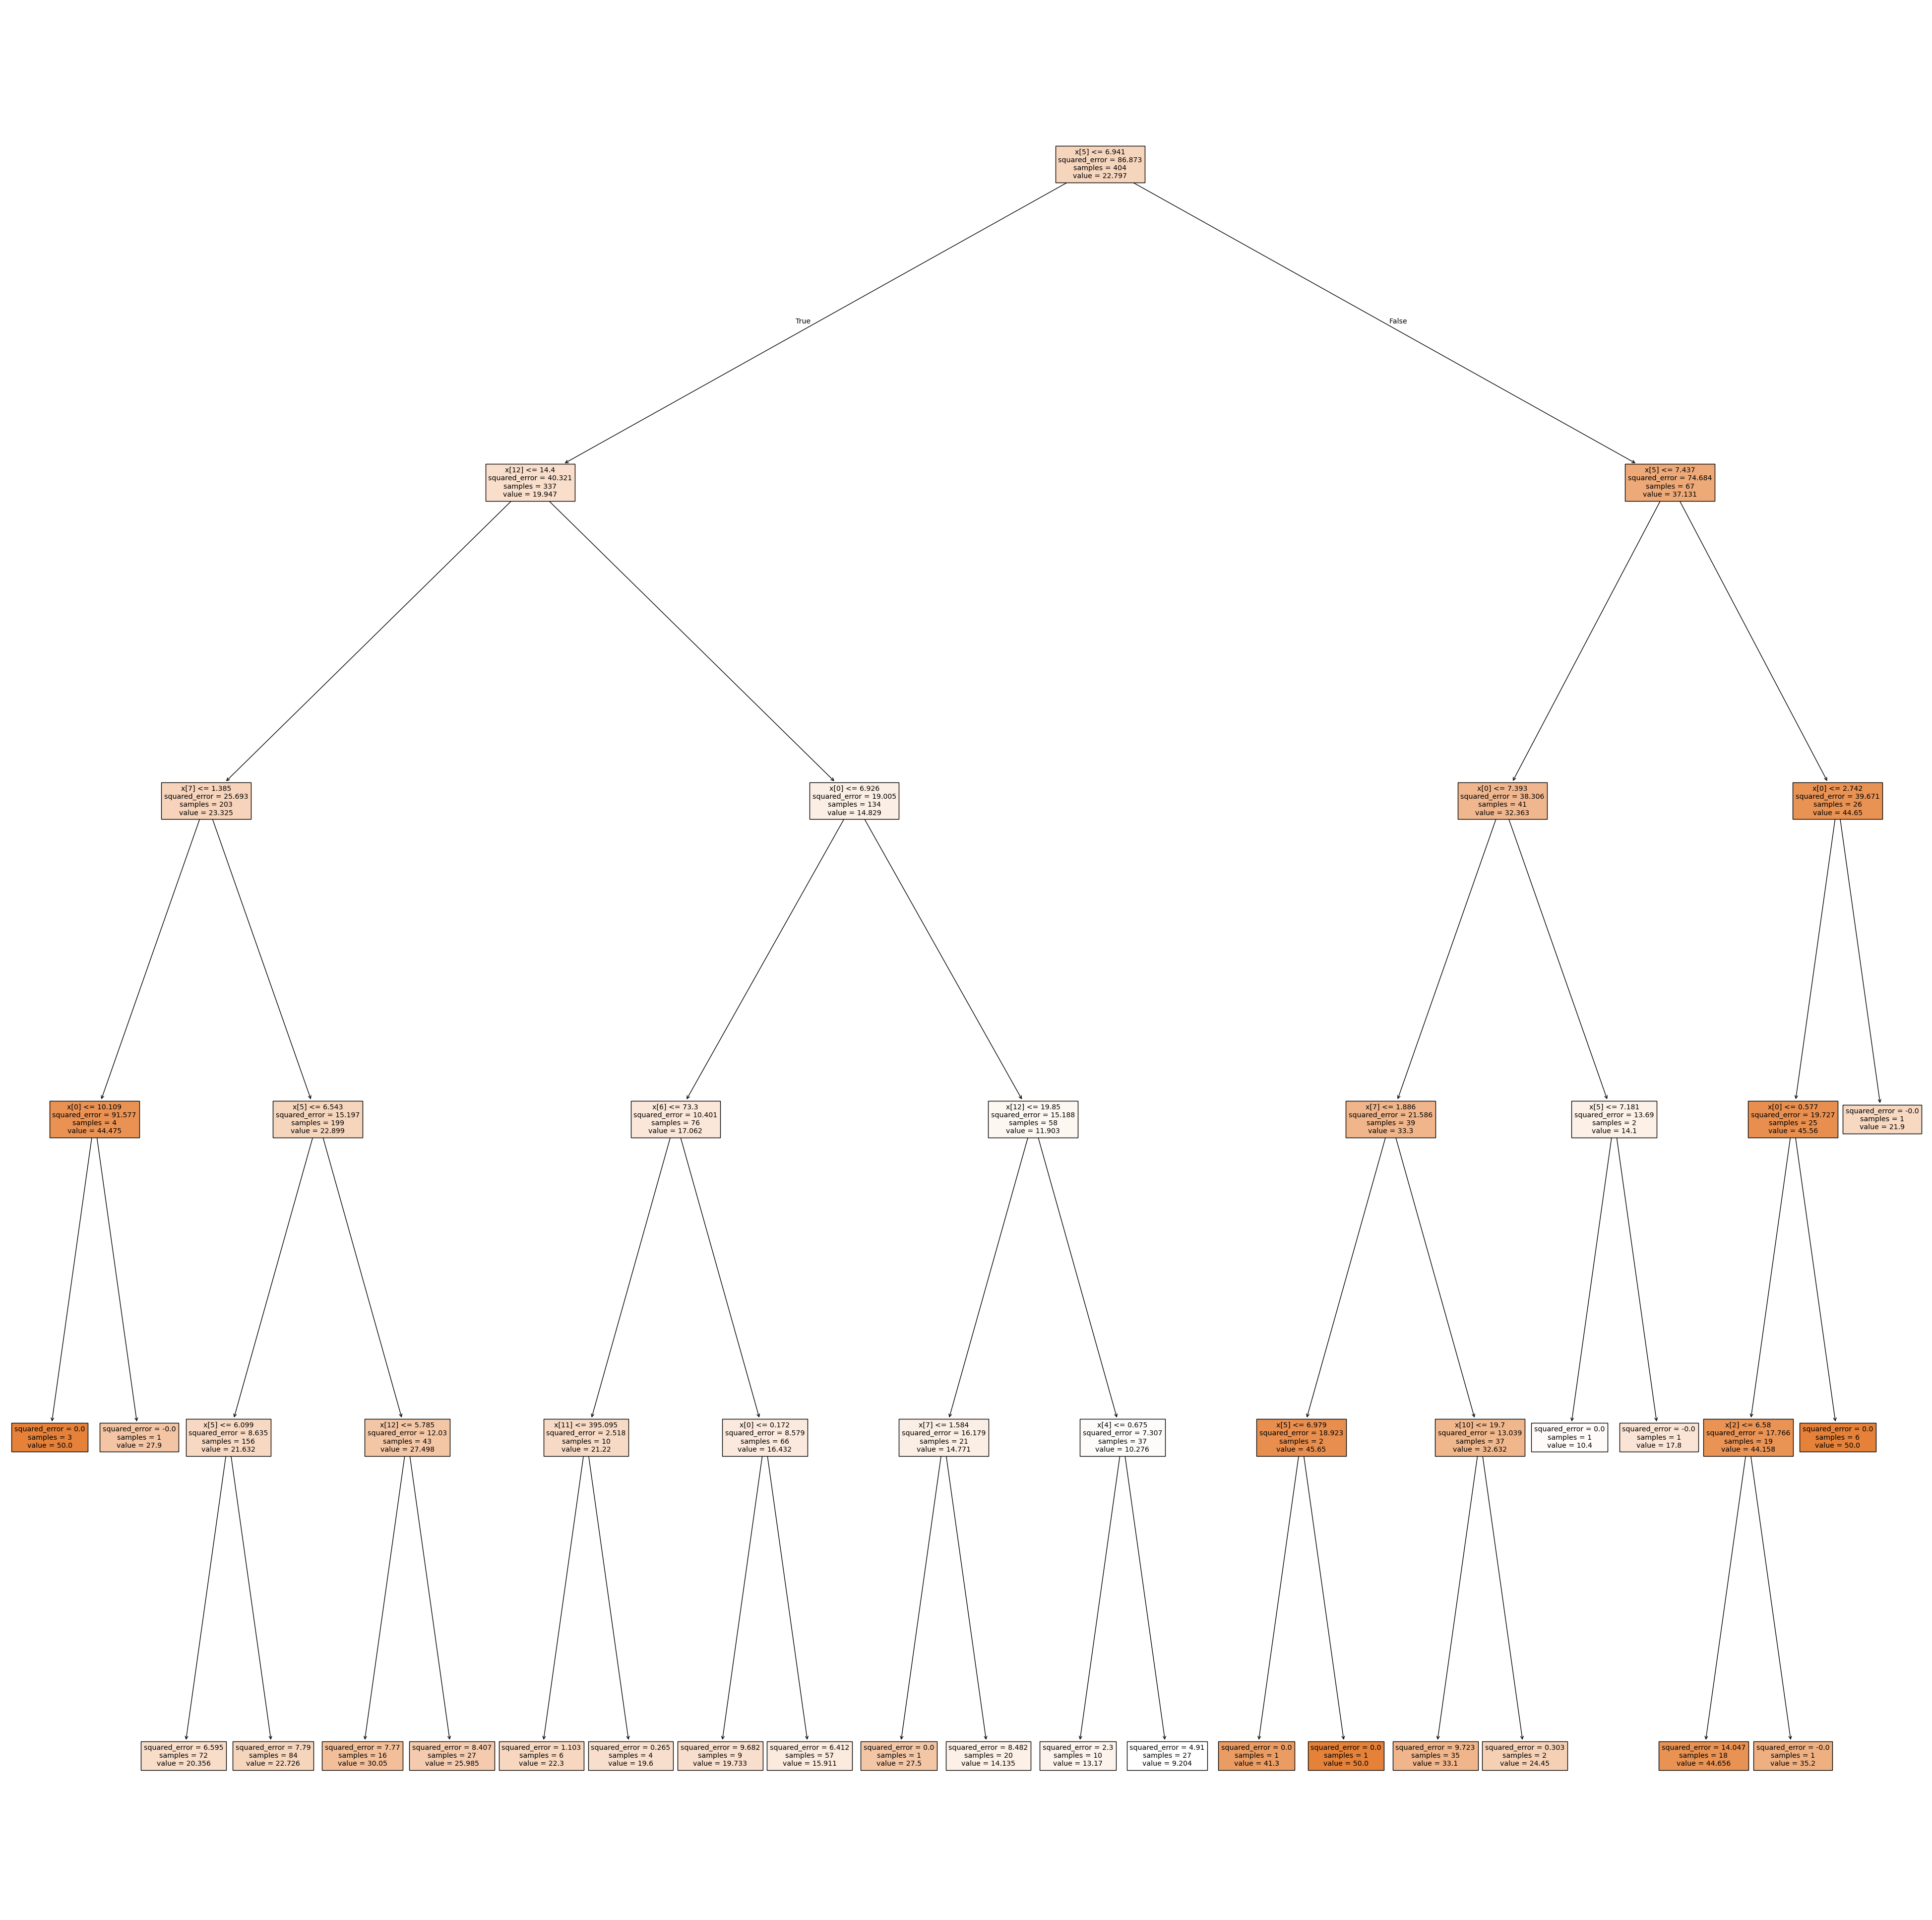

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tree_regressor=DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(X_train,Y_train)
plt.figure(figsize=(50,50))
tree.plot_tree(tree_regressor,filled=True)
Y_pred=tree_regressor.predict(X_test)
print(r2_score(Y_test,Y_pred)) # good performing even with max_depth limitation


In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regressor=BaggingRegressor(estimator=tree_regressor,n_estimators=100,bootstrap=True,oob_score=True)
bag_regressor.fit(X_train,Y_train)
y_pred=bag_regressor.predict(X_test)
print(bag_regressor.oob_score_)
print(Y_test[:5])
print(y_pred[:5])
print(r2_score(Y_test,y_pred))#this model performing well than linear,ridge and lasso


0.8178076802082253
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[22.43038975 30.68013155 16.72853671 22.67896358 16.49326508]
0.8643592879728694


In [ ]:
from sklearn.ensemble import AdaBoostRegressor #stumps
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
boost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=0
)
boost_model.fit(X_train, Y_train)
y_pred_boost = boost_model.predict(X_test)
print(Y_test[:5])
print(y_pred_boost[:5])
print(r2_score(Y_test,y_pred_boost)) #working bad comparitive with bagging

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[22.11486486 35.1464     17.76785714 32.05485714 17.76785714]
0.4797137986548621


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
model = XGBRegressor(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(Y_test[:5])
print(y_pred[:5])
print(r2_score(Y_test,y_pred)) #best one till now

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:59:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[24.276764 30.46075  17.959005 22.965069 17.133715]
0.9057837838492537


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, Y_train)
y_pred = svr.predict(X_test)
print(Y_test[:5])
print(y_pred[:5]) # too bad performance
print(r2_score(Y_test,y_pred))

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64
[22.5061509  24.44637611 15.48342923 23.47861138 15.85575665]
0.27948125010200275
